In [450]:
import numpy as np
# import esmpy as ESMF
# import xesmf
import xarray as xr
import scipy
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import interp2d
from scipy.interpolate import RectBivariateSpline
from scipy.interpolate import BivariateSpline
from mpl_toolkits.basemap import Basemap, maskoceans

# Read ERA5 Dataset

In [473]:
# df = pd.read_csv('/Akmal/Telyu/Telyu/TA/preprocessing/era5.csv', sep=',', header=None)
# era5 = df.to_numpy()
ds = xr.open_dataset('/Akmal/Telyu/Telyu/TA/adaptor.mars.internal-1687491637.6332076-21923-14-bd5b8fd1-7438-4e75-b156-31cdf40b321c.nc')
# ERA5 = pd.read_csv('C:/Akmal/Telyu/Telyu/TA/Data/TrainData/ERA5_LandCover_98-22.csv')
GFED=pd.read_csv('C:/Akmal/Telyu/Telyu/TA/DatasetCSV/All/GFED_Original_98-22.csv')

In [474]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 44, latitude: 43, time: 1200)
Coordinates:
  * longitude  (longitude) float32 108.5 108.8 109.0 109.2 ... 118.8 119.0 119.2
  * latitude   (latitude) float32 6.25 6.0 5.75 5.5 ... -3.5 -3.75 -4.0 -4.25
  * time       (time) datetime64[ns] 1998-01-01T12:00:00 ... 2022-12-21T12:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-23 03:40:48 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [476]:
GFED['latitudes'].unique()

array([ 6.125,  5.875,  5.625,  5.375,  5.125,  4.875,  4.625,  4.375,
        4.125,  3.875,  3.625,  3.375,  3.125,  2.875,  2.625,  2.375,
        2.125,  1.875,  1.625,  1.375,  1.125,  0.875,  0.625,  0.375,
        0.125, -0.125, -0.375, -0.625, -0.875, -1.125, -1.375, -1.625,
       -1.875, -2.125, -2.375, -2.625, -2.875, -3.125, -3.375, -3.625,
       -3.875, -4.125])

In [456]:
GFED['longitudes'].unique()

array([108.625, 108.875, 109.125, 109.375, 109.625, 109.875, 110.125,
       110.375, 110.625, 110.875, 111.125, 111.375, 111.625, 111.875,
       112.125, 112.375, 112.625, 112.875, 113.125, 113.375, 113.625,
       113.875, 114.125, 114.375, 114.625, 114.875, 115.125, 115.375,
       115.625, 115.875, 116.125, 116.375, 116.625, 116.875, 117.125,
       117.375, 117.625, 117.875, 118.125, 118.375, 118.625, 118.875,
       119.125])

In [480]:
GFED

,longitudes,latitudes,time,emissions
0,108.625,6.125,1998-01-01 12:00:00,0.0
1,108.875,6.125,1998-01-01 12:00:00,0.0
2,109.125,6.125,1998-01-01 12:00:00,0.0
3,109.375,6.125,1998-01-01 12:00:00,0.0
4,109.625,6.125,1998-01-01 12:00:00,0.0
...,...,...,...,...
541795,118.125,-4.125,2022-12-01 12:00:00,0.0
541796,118.375,-4.125,2022-12-01 12:00:00,0.0
541797,118.625,-4.125,2022-12-01 12:00:00,0.0
541798,118.875,-4.125,2022-12-01 12:00:00,0.0


Finding and setting the resolution of the Datasets coordinates for regridding

In [481]:
print((ds['latitude'].max() - ds['latitude'].min())/(ds['latitude'].count()-1.),'\n',
      (ds['longitude'].max() - ds['longitude'].min())/(ds['longitude'].count()-1.),'\n\n',
     )

<xarray.DataArray 'latitude' ()>
array(0.25) 
 <xarray.DataArray 'longitude' ()>
array(0.25) 




In [482]:
x=np.arange(108.625, 119.125, 0.250)
y=np.arange(-4.1255,6.125, 0.250)

In [483]:
x.shape

(42,)

In [484]:
y.shape

(42,)

# Regrid the dataset into the coordinates

In [485]:
regrid = ds.interp(latitude=y, longitude=x, method= "cubic")

In [486]:
era5=regrid.to_dataframe()
era5.to_csv('Data/era5/era5_regrid.csv')

Getting datasets from year range from 1998 to 2022

In [489]:
data=pd.read_csv('Data/era5/era5_regrid.csv')
# era_22=data[(data['time'] > '1998-01-01 00:00:00') & (data['time'] < '2022-12-31 06:00:00')]
# data.to_csv('Data/era5/era5_1998-2022.csv')

In [490]:
data

,time,latitude,longitude,u10,d2m,t2m,tp
0,1998-01-01 12:00:00,-4.1255,108.625,3.600567,297.211179,300.629382,8.784229e-06
1,1998-01-01 12:00:00,-4.1255,108.875,3.595333,297.261011,300.608852,6.716588e-06
2,1998-01-01 12:00:00,-4.1255,109.125,3.624363,297.401572,300.473022,-4.374598e-07
3,1998-01-01 12:00:00,-4.1255,109.375,3.707549,297.550733,300.351714,1.650706e-06
4,1998-01-01 12:00:00,-4.1255,109.625,3.798673,297.544271,300.395672,6.587837e-06
...,...,...,...,...,...,...,...
2116795,2022-12-21 12:00:00,6.1245,117.875,1.932070,297.676033,300.682832,-2.775028e-05
2116796,2022-12-21 12:00:00,6.1245,118.125,2.833229,297.606484,300.848785,1.675125e-04
2116797,2022-12-21 12:00:00,6.1245,118.375,3.286052,297.286760,300.952721,5.837712e-04
2116798,2022-12-21 12:00:00,6.1245,118.625,3.306222,297.287807,301.001911,4.886285e-04


In [491]:
data=data.set_index(['longitude','latitude','time'])

In [532]:
data

,,,u10,d2m,t2m,tp
longitude,latitude,time,,,,
108.625,-4.1255,1998-01-01 12:00:00,3.600567,297.211179,300.629382,8.784229e-06
108.875,-4.1255,1998-01-01 12:00:00,3.595333,297.261011,300.608852,6.716588e-06
109.125,-4.1255,1998-01-01 12:00:00,3.624363,297.401572,300.473022,-4.374598e-07
109.375,-4.1255,1998-01-01 12:00:00,3.707549,297.550733,300.351714,1.650706e-06
109.625,-4.1255,1998-01-01 12:00:00,3.798673,297.544271,300.395672,6.587837e-06
...,...,...,...,...,...,...
117.875,6.1245,2022-12-21 12:00:00,1.932070,297.676033,300.682832,-2.775028e-05
118.125,6.1245,2022-12-21 12:00:00,2.833229,297.606484,300.848785,1.675125e-04
118.375,6.1245,2022-12-21 12:00:00,3.286052,297.286760,300.952721,5.837712e-04


# Get ERA5 Land Cover Only

In [533]:
data.index.unique(level='longitude').shape

(42,)

In [534]:
data.index.unique(level='latitude').shape

(42,)

In [539]:
lat=data.index.unique(level='latitude')
lon=data.index.unique(level='longitude')

In [536]:
lat

Float64Index([            -4.1255,             -3.8755,             -3.6255,
                          -3.3755,             -3.1255,             -2.8755,
                          -2.6255,             -2.3755,             -2.1255,
                          -1.8755, -1.6254999999999995, -1.3754999999999995,
              -1.1254999999999995, -0.8754999999999997, -0.6254999999999997,
              -0.3754999999999997, -0.1254999999999997,  0.1245000000000002,
               0.3745000000000003,  0.6245000000000003,  0.8745000000000003,
               1.1245000000000005,  1.3745000000000005,  1.6245000000000005,
               1.8745000000000005,  2.1245000000000003,  2.3745000000000003,
               2.6245000000000003,  2.8745000000000003,  3.1245000000000003,
               3.3745000000000003,              3.6245,              3.8745,
                           4.1245,              4.3745,              4.6245,
                           4.8745,              5.1245,              5.3745,

In [537]:
x =data.query("time == '1998-01-01 12:00:00'").u10.to_numpy()

In [540]:
x= x.reshape((len(lat),len(lon)),order='F')

In [542]:
x

array([[ 3.60056738,  3.58465373,  3.87206345, ..., -4.36939803,
        -4.54038801, -4.85222593],
       [ 3.59533287,  3.53801232,  3.81846099, ..., -4.5753137 ,
        -4.77195236, -5.07318318],
       [ 3.62436298,  3.51151417,  3.71426956, ..., -4.88379938,
        -5.04110118, -5.22836454],
       ...,
       [ 3.30599072,  2.96857198,  2.39490347, ..., -0.64297429,
        -2.35452383, -3.9603972 ],
       [ 4.21537637,  4.03241295,  3.67047489, ..., -1.7489757 ,
        -3.14522713, -3.84927381],
       [ 4.88966218,  4.93572066,  4.56053768, ..., -2.99504363,
        -3.70197204, -3.67009804]])

In [543]:
def drawmap(lat, lon, variabels, title, unit):
    fig = plt.figure(figsize = (6,6))
    lons,lats=np.meshgrid(lon,lat)
    m = Basemap(llcrnrlon = 108, llcrnrlat = -4.25, 
                urcrnrlon = 119.25, urcrnrlat = 6.25, 
                resolution = 'i', projection = 'merc')
    m.drawcoastlines(linewidth=1.0, linestyle='solid',color = 'black')
    m.fillcontinents(color='linen',lake_color='aqua', alpha=0.9)
    m.drawparallels(np.arange(-4.25,6.25,0.25),labels=[1,0,0,0],fontsize=5, linewidth=0.2, dashes=[10, 10])
    m.drawmeridians(np.arange(108,119.25,0.25),labels=[0,0,0,1],fontsize=5, linewidth=0.2, dashes=[10, 10])
    x, y = m(lons, lats)
    print(x,y)
    print(x.shape, y.shape, variabels.shape)
    data_new = maskoceans(lons,lats,variabels,resolution='h',grid=1.25)
    r = m.pcolormesh(x, y,data_new)
    plt.ylabel("Latitude", fontsize=12, labelpad=20)
    plt.xlabel("Longitude", fontsize=12, labelpad=20)
    plt.title(title, fontsize=12); plt.colorbar(r, label=unit, extend='max')
    plt.show()
    return data_new

[[  69496.79642793   97295.5149991   125094.23357027 ... 1153646.82070357
  1181445.53927474 1209244.25784591]
 [  69496.79642793   97295.5149991   125094.23357027 ... 1153646.82070357
  1181445.53927474 1209244.25784591]
 [  69496.79642793   97295.5149991   125094.23357027 ... 1153646.82070357
  1181445.53927474 1209244.25784591]
 ...
 [  69496.79642793   97295.5149991   125094.23357027 ... 1153646.82070357
  1181445.53927474 1209244.25784591]
 [  69496.79642793   97295.5149991   125094.23357027 ... 1153646.82070357
  1181445.53927474 1209244.25784591]
 [  69496.79642793   97295.5149991   125094.23357027 ... 1153646.82070357
  1181445.53927474 1209244.25784591]] [[  13880.82483548   13880.82483548   13880.82483548 ...   13880.82483548
    13880.82483548   13880.82483548]
 [  41747.46437234   41747.46437234   41747.46437234 ...   41747.46437234
    41747.46437234   41747.46437234]
 [  69605.86806708   69605.86806708   69605.86806708 ...   69605.86806708
    69605.86806708   69605.86806

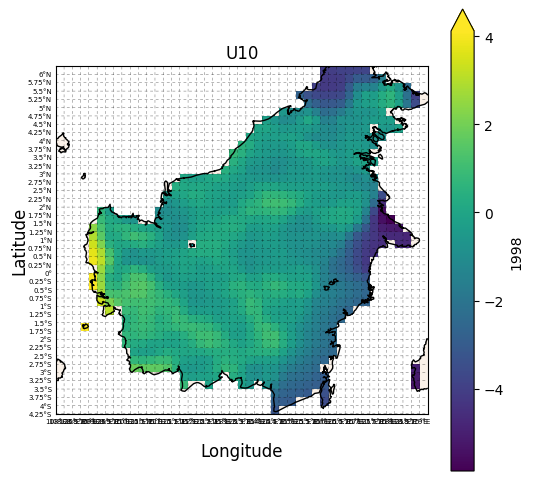

In [544]:
mask = drawmap(lat, lon, x, "U10","1998").mask

In [545]:
mask.shape

(42, 42)

In [546]:
lat.shape

(42,)

In [547]:
lon.shape

(42,)

In [548]:
def filtergrid(mask, lat, lon, df, data_new):
    for i in range(len(mask[1])-1):
        for j in range(len(mask[0])-1):
            if mask[j][i] == False:
                print(mask[j][i])
                if data_new.empty:
                    data_new= df.query("(longitude == "+str(lon[i])+")&(latitude==" +str(lat[j])+")")
                else:
                    data_new = pd.concat([data_new,df.query("(longitude == "+str(lon[i])+")&(latitude==" +str(lat[j])+")")] )  
    return data_new

In [549]:
data_new = pd.DataFrame()
new = filtergrid(mask,lat,lon,data, data_new)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [551]:
new

u10         d2m         t2m  \
longitude latitude time                                                    
108.875   -1.6255  1998-01-01 12:00:00  2.416471  296.842837  300.062261   
                   1998-01-07 12:00:00 -1.817334  296.806251  301.226366   
                   1998-01-14 12:00:00  1.162285  297.675422  300.790850   
                   1998-01-21 12:00:00  3.177221  297.081287  301.158597   
                   1998-02-01 12:00:00  0.419883  297.391125  301.009130   
...                                          ...         ...         ...   
118.625    5.6245  2022-11-21 12:00:00  0.364211  297.906931  299.157838   
                   2022-12-01 12:00:00 -0.128907  297.140423  298.948023   
                   2022-12-07 12:00:00 -1.729728  297.370516  298.280906   
                   2022-12-14 12:00:00  0.485776  297.197649  300.642918   
                   2022-12-21 12:00:00  0.923938  297.665254  300.073299   

                                                  tp  
longitude latitude time                               
108.875   -1.6255  1998-01-01 12:00:00  2.230134e-04  
                   1998-01-07 12:00:00  2.112138e-06  
                   1998-01-14 12:00:00  1.336901e-07  
                   1998-01-21 12:00:00  3.593227e-05  
                   1998-02-01 12:00:00  1.473058e-06  
...                                              ...  
118.625    5.6245  2022-11-21 12:00:00  6.276189e-04  
                   2022-12-01 12:00:00  2.578234e-04  
                   2022-12-07 12:00:00  4.040960e-04  
                   2022-12-14 12:00:00 -8.961977e-07  
                   2022-12-21 12:00:00 -2.333291e-05  

[1132800 rows x 4 columns]

In [552]:
new=new.reset_index(level=[0,1,2])

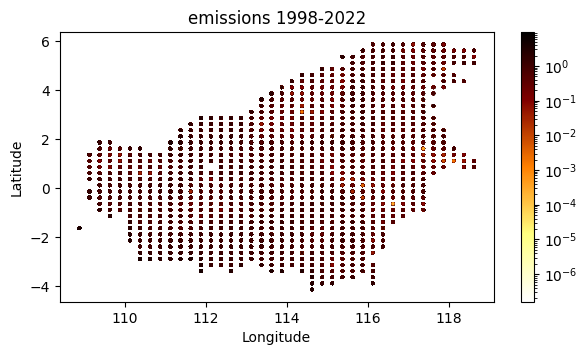

In [553]:
from matplotlib import colors

fig = plt.figure()
fig.set_size_inches(7, 3.5)
cols = plt.scatter(new['longitude'], 
                   new['latitude'], 
                   c=new['u10'], 
                   s=2, 
                   norm=colors.LogNorm(),
                   cmap='afmhot_r')
plt.colorbar(cols)
plt.title("Data Distribution")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [554]:
new.to_csv('Data/era5/era5_1998-2022.csv')